In [1]:
import numpy as np
from numpy.linalg import inv
import _pickle as cp
import matplotlib.pyplot as plt

In [2]:
X, y = cp.load(open('winequality-white.pickle', 'rb'))

In [3]:
N, D = X.shape
N_train = int(0.8 * N)
N_test = N - N_train
X_train = X[:N_train]
y_train = y[:N_train]
X_test = X[N_train:]
y_test = y[N_train:]

## Handin 1

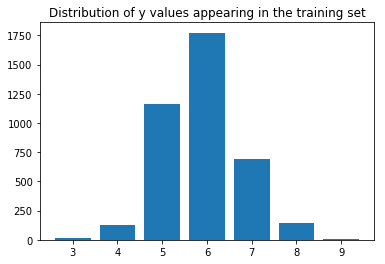

In [4]:
def categorize(train):
    hist = {}
    for i in train:
        hist[i] = hist.get(i, 0) + 1
    return hist

count = categorize(y_train)
plt.bar(count.keys(), count.values())
plt.title('Distribution of y values appearing in the training set')
plt.show()

## Handin 2

In [5]:
average_y_train = np.mean(y_train)

def mseError(predictor, y):
    y = y - predictor
    y = y * y
    return np.sum(y)/len(y)

print("Eorror on the training dataset", mseError(average_y_train, y_train))
print("Eorror on the testing dataset", mseError(average_y_train, y_test))


Eorror on the training dataset 0.7767772386501117
Eorror on the testing dataset 0.8138573000045535


## Handin 3

In [6]:
def standarlize(x):
    var = np.var(x)
    mean = np.mean(x)
    return (mean, var)

def transformData(x, mean, var):
    x -= mean
    x /= np.sqrt(var)
    return x

def find_weight(X, y):
    X_trans = X.T
    return np.matmul(np.matmul(inv(np.matmul(X_trans, X)), X_trans), y)

In [7]:
# Placeholder for the standalized data
X_train_standard = np.zeros(shape = X_train.shape)
X_test_standard = np.zeros(shape = X_test.shape)


# For each feature, calculate for mean and std, transform the data for both test/train
for i in range(D):
    train_data = X_train[:, i]
    test_data = X_test[:, i]
    
    m,v = standarlize(train_data)
    
    X_train_standard[:, i] = transformData(train_data, m, v)
    X_test_standard[:, i] = transformData(test_data, m, v)
    
    print("training: mean =", np.mean(X_train_standard[:, i]), "var =", np.var(X_train_standard[:, i]))
    print("Testing: mean =", np.mean(X_test_standard[:, i]), "var =", np.var(X_test_standard[:, i]))


training: mean = -8.342257745013938e-16 var = 1.0
Testing: mean = 0.003052784603897342 var = 1.0559133327466625
training: mean = -3.808422014028102e-17 var = 1.0
Testing: mean = -0.007511859999128254 var = 1.1233168622542755
training: mean = -1.6684515490027876e-16 var = 1.0
Testing: mean = -0.0282096421779161 var = 0.741905848945599
training: mean = 6.619400167239321e-17 var = 1.0000000000000002
Testing: mean = -0.03437040308176067 var = 1.01439428211428
training: mean = -3.899098728647819e-16 var = 1.0000000000000002
Testing: mean = -0.011299108564615985 var = 1.0831531580187885
training: mean = -6.34737002338017e-18 var = 0.9999999999999996
Testing: mean = -0.005327945753180026 var = 0.9445614430786272
training: mean = -1.4689627768394107e-16 var = 1.0
Testing: mean = -0.017991526288517717 var = 1.022899496018027
training: mean = 2.1566549805153423e-14 var = 0.9999999999999999
Testing: mean = -0.0223959733862736 var = 1.0361602306269686
training: mean = -2.141783999317709e-15 var = 

In [8]:
# Include a column of ones to data matrices
b_training = np.ones((N_train,1))
b_test = np.ones((N_test,1))
b_tot = np.ones((N,1))

new_X_train_standard = np.hstack((b_training, X_train_standard))
new_X_test_standard = np.hstack((b_test, X_test_standard))

weights = find_weight(new_X_train_standard, y_train)

# Expected y
y_train_expected = np.dot(new_X_train_standard, weights)
y_test_expected = np.dot(new_X_test_standard, weights)

print("Eorror on the training dataset", mseError(y_train_expected, y_train))
print("Eorror on the testing dataset", mseError(y_train_expected, y_train))


Eorror on the training dataset 0.5639996173941924
Eorror on the testing dataset 0.5639996173941924


## Handin 4 Learning Curve

In [9]:
def FirstNmseError(predictor, y, N):
    t = y[0:N] - predictor[0:N]
    t = t * t
    return np.sum(t)/len(t)

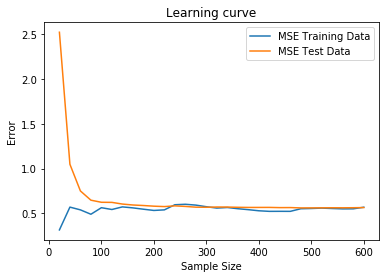

In [10]:
train_error = []
test_error = []

for i in range(20, 601, 20):
    weights = find_weight(new_X_train_standard[:i], y_train[:i])

    # Expected y
    y_train_expected = np.dot(new_X_train_standard[:i], weights)
    y_test_expected = np.dot(new_X_test_standard, weights)
    
    train_error.append(FirstNmseError(y_train_expected, y_train, i))
    test_error.append(mseError(y_test_expected, y_test))
    
mat1 = np.array(train_error)
mat2 = np.array(test_error)

plt.figure()
plt.title('Learning curve')
plt.xlabel("Sample Size")
plt.ylabel('Error')
plt.plot(np.linspace(20,600, num=mat1.shape[0]), mat1, label='MSE Training Data')
plt.plot(np.linspace(20,600, num=mat2.shape[0]), mat2, label='MSE Test Data')
plt.legend()
plt.show()

# Optional

In [11]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from scipy.stats import mode

N, D = X.shape
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.8)
ridge_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(2, include_bias=True), linear_model.Ridge())
lasso_pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(2), linear_model.Lasso())

In [12]:
# Ridge model
ridge_alpha = 0.01
lasso_alpha = 0.01

choice = [0.01, 0.1, 1, 10, 100]
ridge_score = np.zeros(5)
lasso_score = np.zeros(5)

for _ in range(10):
    X_train, X_validate, y_train, y_validate = train_test_split(X_train_val, y_train_val, test_size=0.8)
    for i in range(5):
        ridge_pipeline.set_params(ridge__alpha=choice[i])        
        ridge_pipeline.fit(X_train, y_train)
        s = ridge_pipeline.score(X_validate,y_validate)
#         print("lambda", choice[i], "score", s)
        ridge_score[i] += s
        
        lasso_pipeline.set_params(lasso__alpha=choice[i])
        lasso_pipeline.fit(X_train, y_train)
        s = lasso_pipeline.score(X_validate,y_validate)
#         print("lambda", choice[i], "score", s)
        lasso_score[i] += s
        
print("Best alpha for ridge model:", choice[np.argmax(ridge_score)])
print("Best alpha for lasso model:", choice[np.argmax(lasso_score)])

Best alpha for ridge model: 100
Best alpha for lasso model: 0.1


In [13]:
ridge_pipeline.set_params(ridge__alpha=choice[np.argmax(ridge_score)])
lasso_pipeline.set_params(lasso__alpha=choice[np.argmax(lasso_score)])

ridge_pipeline.fit(X_train_val, y_train_val)
lasso_pipeline.fit(X_train_val, y_train_val)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [14]:
def error(pipeline, x, y, name, ifTraining):
    y_true = y
    y_pred = pipeline.predict(x)
    error = mean_squared_error(y_true, y_pred)
    if ifTraining:
        print("Error on Training data set with", name, ":", error)
    else:
        print("Error on Testting data set with", name, ":", error)

error(ridge_pipeline, X_train_val, y_train_val, "Ridge", True)
error(ridge_pipeline, X_test, y_test, "Ridge", False)

print()
error(lasso_pipeline, X_train_val, y_train_val, "Lasso", True)
error(lasso_pipeline, X_test, y_test, "Lasso", False)


Error on Training data set with Ridge : 0.4134453519923849
Error on Testting data set with Ridge : 0.6362414670332428

Error on Training data set with Lasso : 0.5213861832957443
Error on Testting data set with Lasso : 0.641977779268466
